In [57]:
# Importando bibliotecas
import math
import sys, os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Adicionando caminho para os módulos Python
sys.path.append(os.path.abspath(os.path.join('modulos')))
from modulo01 import *
from modulo02 import *
from modulo03 import *

In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
df_original = pd.read_csv("Crash_Data.csv")

C:\Users\vilia\AppData\Local\Temp/ipykernel_13348/3112730616.py:1: DtypeWarning: Columns (10,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv("Crash_Data.csv")


In [5]:
#Realizando cópia do dataframe original, para realizar tratamento de dados
df_limpo = df_original.copy()

In [6]:
#Função presente nos módulos para exibir porcentagem de dados ausentes
func_calc_percentual_valores_ausentes(df_limpo)

O dataset tem 16.89 % de valores ausentes.


In [7]:
#Função para mostrar quantidade de valores ausentes por coluna
df_missing = func_calc_percentual_valores_ausentes_coluna(df_limpo)

O dataset tem 23 colunas.
Encontrado: 11 colunas que têm valores ausentes.


In [8]:
#Relação de porcentagem de dados faltantes por coluna
df_missing

,Valores Ausentes,% de Valores Ausentes,Dtype
National Road Type,45966,86.99,object
National Remoteness Areas,45965,86.98,object
SA4 Name 2016,45951,86.96,object
National LGA Name 2017,45950,86.96,object
Heavy Rigid Truck Involvement,20515,38.82,object
Speed Limit,702,1.33,object
Age Group,90,0.17,object
Time,40,0.08,object
Gender,27,0.05,object
Bus Involvement,22,0.04,object


In [9]:
# Colunas que serão removidas. Definido valor de 80. Unica coluna com porcentagem alta que será tratada é Heavy Rigid Truck Involvement
colunas_para_remover = df_missing[df_missing['% de Valores Ausentes'] >= 40.00].index.tolist()

In [10]:
colunas_para_remover

['National Road Type',
 'National Remoteness Areas',
 'SA4 Name 2016',
 'National LGA Name 2017']

In [11]:
# Drop das colunas
df_limpo = df_limpo.drop(colunas_para_remover, axis = 1)

In [12]:
df_limpo.shape

(52843, 19)

In [13]:
#Quantidade de valores ausentes após remoção de quatro colunas
func_calc_percentual_valores_ausentes(df_limpo)

O dataset tem 2.13 % de valores ausentes.


In [14]:
#Analisando a coluna Heavy Rigid Truck Involvement. Possui 38% de valores ausentes. Verificando se há alguma ausência em período específico
df_limpo.columns

Index(['Crash ID', 'State', 'Month', 'Year', 'Dayweek', 'Time', 'Crash Type',
       'Bus Involvement', 'Heavy Rigid Truck Involvement',
       'Articulated Truck Involvement', 'Speed Limit', 'Road User', 'Gender',
       'Age', 'Christmas Period', 'Easter Period', 'Age Group', 'Day of week',
       'Time of day'],
      dtype='object')

In [15]:
df_limpo['Heavy Rigid Truck Involvement'].value_counts()

No     30735
Yes     1593
Name: Heavy Rigid Truck Involvement, dtype: int64

In [16]:
Crash_truck = df_limpo.loc[df_limpo['Heavy Rigid Truck Involvement'] == 'Yes'] 
Crash_truck

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day
40,20213187,Qld,9,2021,Wednesday,7:00,Multiple,No,Yes,Yes,100,Driver,Male,62,No,No,40_to_64,Weekday,Day
50,20214007,SA,9,2021,Wednesday,8:06,Multiple,No,Yes,No,60,Pedal cyclist,Female,70,No,No,65_to_74,Weekday,Day
51,20215008,WA,9,2021,Wednesday,15:33,Multiple,No,Yes,No,110,Passenger,Female,66,No,No,65_to_74,Weekday,Day
71,20214058,SA,9,2021,Friday,13:45,Multiple,No,Yes,No,100,Driver,Male,77,No,No,75_or_older,Weekday,Day
108,20215013,WA,8,2021,Wednesday,15:48,Multiple,No,Yes,No,80,Driver,Female,37,No,No,26_to_39,Weekday,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26872,20023013,Qld,1,2002,Wednesday,15:00,Multiple,No,Yes,No,100,Motorcycle rider,Male,42,No,No,40_to_64,Weekday,Day
26876,20023283,Qld,1,2002,Thursday,12:00,Multiple,No,Yes,No,80,Driver,Male,49,No,No,40_to_64,Weekday,Day
26879,20021446,NSW,1,2002,Monday,6:29,Multiple,No,Yes,No,80,Driver,Male,67,No,No,65_to_74,Weekday,Day
26896,20021211,NSW,1,2002,Saturday,7:50,Single,No,Yes,No,60,Pedestrian,Male,83,No,No,75_or_older,Weekend,Day


In [17]:
#Encontrado o problema. Coluna que classifica acidentes com caminhões só começaram a partir de 2002. Valores ausentes serão substuídos por
Crash_truck.sort_values('Year')

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day
26914,20023127,Qld,1,2002,Wednesday,13:00,Multiple,No,Yes,No,100,Driver,Male,79,No,No,75_or_older,Weekday,Day
25653,20024005,SA,9,2002,Friday,19:30,Multiple,No,Yes,No,110,Pedestrian,Female,14,No,No,0_to_16,Weekend,Night
25671,20021296,NSW,9,2002,Wednesday,2:47,Multiple,No,Yes,No,70,Driver,Female,20,No,No,17_to_25,Weekday,Night
25710,20021052,NSW,9,2002,Thursday,7:05,Multiple,No,Yes,No,110,Driver,Male,85,No,No,75_or_older,Weekday,Day
25731,20021467,NSW,9,2002,Friday,12:25,Multiple,No,Yes,Yes,80,Driver,Male,38,No,No,26_to_39,Weekday,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,20211039,NSW,4,2021,Saturday,12:55,Multiple,No,Yes,No,50,Motorcycle rider,Male,57,No,Yes,40_to_64,Weekend,Day
477,20211101,NSW,4,2021,Sunday,9:00,Multiple,No,Yes,No,60,Motorcycle rider,Male,46,No,No,40_to_64,Weekend,Day
461,20211119,NSW,5,2021,Wednesday,18:25,Single,No,Yes,No,80,Pedestrian,Male,69,No,No,65_to_74,Weekday,Night
356,20212114,Vic,6,2021,Wednesday,7:06,Multiple,No,Yes,No,80,Motorcycle rider,Male,22,No,No,17_to_25,Weekday,Day


In [18]:
df_limpo

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,NaN,Motorcycle rider,Male,38,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,110,Pedestrian,Female,28,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,NaN,Passenger,Male,19,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,NaN,Driver,Male,23,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,NaN,Motorcycle rider,Male,46,No,No,40_to_64,Weekend,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52838,19891246,NSW,1,1989,Wednesday,17:05,Single,Yes,NaN,No,60,Passenger,Female,5,No,No,0_to_16,Weekday,Day
52839,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,No,110,Passenger,Male,19,Yes,No,17_to_25,Weekday,Day
52840,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,No,110,Passenger,Male,17,Yes,No,17_to_25,Weekday,Day
52841,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,No,110,Passenger,Male,17,Yes,No,17_to_25,Weekday,Day


In [19]:
df_limpo['Heavy Rigid Truck Involvement'].fillna("Unknown", inplace=True)

In [20]:
#Função para mostrar quantidade de valores ausentes por coluna
df_missing2 = func_calc_percentual_valores_ausentes_coluna(df_limpo)
df_missing2

O dataset tem 19 colunas.
Encontrado: 6 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
Speed Limit,702,1.33,object
Age Group,90,0.17,object
Time,40,0.08,object
Gender,27,0.05,object
Bus Involvement,22,0.04,object
Articulated Truck Involvement,22,0.04,object


In [21]:
df_limpo.shape

(52843, 19)

In [22]:
#Agora vamos tratar a coluna Speed limit. Valores duplicados, Removi o sinal de < e a palavra Unspecified e converti para float, para unificar.
df_limpo['Speed Limit'].value_counts()

100            11020
100             7228
60              7123
60              6563
80              4439
110             3970
50              2883
110             2068
70              1888
80              1680
90               820
-9               684
70               650
90               317
40               299
75               252
130              116
40                47
20                24
50                20
10                18
30                11
<40                5
30                 3
20                 3
5                  3
Unspecified        2
75                 2
25                 2
15                 1
Name: Speed Limit, dtype: int64

In [23]:
df_limpo['Speed Limit'] = np.where(df_limpo['Speed Limit'] == "<40", 40, df_limpo['Speed Limit'])
df_limpo['Speed Limit'] = np.where(df_limpo['Speed Limit'] == "Unspecified", 0, df_limpo['Speed Limit'])

In [24]:
df_limpo['Speed Limit'] = df_limpo['Speed Limit'].astype(float)

In [25]:
df_limpo['Speed Limit'].value_counts()

 100.0    18248
 60.0     13686
 80.0      6119
 110.0     6038
 50.0      2903
 70.0      2538
 90.0      1137
-9.0        684
 40.0       351
 75.0       254
 130.0      116
 20.0        27
 10.0        18
 30.0        14
 5.0          3
 25.0         2
 0.0          2
 15.0         1
Name: Speed Limit, dtype: int64

In [26]:
df_limpo['Speed Limit'].isnull().sum()

702

In [27]:
#Como se trata de 1,33% de dados ausentes, poderia excluir ou aplicar moda. Visando não perder registros, vamos aplicar moda
df_limpo['Speed Limit'].fillna(100.0, inplace=True)

In [28]:
df_limpo['Speed Limit'].isnull().sum()

0

In [29]:
df_limpo['Speed Limit'].value_counts()

 100.0    18950
 60.0     13686
 80.0      6119
 110.0     6038
 50.0      2903
 70.0      2538
 90.0      1137
-9.0        684
 40.0       351
 75.0       254
 130.0      116
 20.0        27
 10.0        18
 30.0        14
 5.0          3
 25.0         2
 0.0          2
 15.0         1
Name: Speed Limit, dtype: int64

In [30]:
#Agora vamos remover as linhas que possuem valores ausentes: -9 e 0, além de valores que possuem baixissima quantidade de acidentes
df_limpo.drop(df_limpo[df_limpo['Speed Limit'] <= 30].index, inplace = True)
df_limpo['Speed Limit'].value_counts()

100.0    18950
60.0     13686
80.0      6119
110.0     6038
50.0      2903
70.0      2538
90.0      1137
40.0       351
75.0       254
130.0      116
Name: Speed Limit, dtype: int64

In [31]:
#Verificando quantos campos em branco ainda permanecem no dataframe
df_limpo.isnull().sum()

Crash ID                          0
State                             0
Month                             0
Year                              0
Dayweek                           0
Time                             30
Crash Type                        0
Bus Involvement                  22
Heavy Rigid Truck Involvement     0
Articulated Truck Involvement    22
Speed Limit                       0
Road User                         0
Gender                           27
Age                               0
Christmas Period                  0
Easter Period                     0
Age Group                        88
Day of week                       0
Time of day                       0
dtype: int64

In [33]:
#Por se tratarem de quantidades muito pequenas, optei por remover linhas com valores nulos
df_limpo.dropna(inplace=True)
df_limpo

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,110.0,Pedestrian,Female,28,No,No,26_to_39,Weekend,Night
5,20213034,Qld,9,2021,Saturday,4:00,Multiple,No,No,No,100.0,Motorcycle rider,Male,19,No,No,17_to_25,Weekend,Night
6,20215071,WA,9,2021,Saturday,19:10,Single,No,No,No,100.0,Driver,Female,20,No,No,17_to_25,Weekend,Night
8,20213026,Qld,9,2021,Wednesday,23:00,Multiple,No,No,No,100.0,Passenger,Female,2,No,No,0_to_16,Weekday,Night
9,20213092,Qld,9,2021,Saturday,2:00,Single,No,No,No,60.0,Driver,Male,47,No,No,40_to_64,Weekend,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52838,19891246,NSW,1,1989,Wednesday,17:05,Single,Yes,Unknown,No,60.0,Passenger,Female,5,No,No,0_to_16,Weekday,Day
52839,19895088,WA,1,1989,Monday,6:00,Single,No,Unknown,No,110.0,Passenger,Male,19,Yes,No,17_to_25,Weekday,Day
52840,19895088,WA,1,1989,Monday,6:00,Single,No,Unknown,No,110.0,Passenger,Male,17,Yes,No,17_to_25,Weekday,Day
52841,19895088,WA,1,1989,Monday,6:00,Single,No,Unknown,No,110.0,Passenger,Male,17,Yes,No,17_to_25,Weekday,Day


In [34]:
df_limpo.isnull().sum()

Crash ID                         0
State                            0
Month                            0
Year                             0
Dayweek                          0
Time                             0
Crash Type                       0
Bus Involvement                  0
Heavy Rigid Truck Involvement    0
Articulated Truck Involvement    0
Speed Limit                      0
Road User                        0
Gender                           0
Age                              0
Christmas Period                 0
Easter Period                    0
Age Group                        0
Day of week                      0
Time of day                      0
dtype: int64

In [35]:
#Confirmando se não há acidentes ids duplicados antes de excluir a coluna
df_limpo['Crash ID'].drop_duplicates(inplace=True)

In [36]:
df_limpo.shape

(51933, 19)

In [37]:
del df_limpo['Crash ID']

In [38]:
df_limpo.shape

(51933, 18)

In [39]:
#Vamos divir a coluna para hora e minuto, para uso em análise posteriormente
df_limpo[['Hour', 'Minute']] = df_limpo['Time'].str.split(':', expand=True)
df_limpo

,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day,Hour,Minute
1,SA,9,2021,Saturday,23:31,Multiple,No,No,No,110.0,Pedestrian,Female,28,No,No,26_to_39,Weekend,Night,23,31
5,Qld,9,2021,Saturday,4:00,Multiple,No,No,No,100.0,Motorcycle rider,Male,19,No,No,17_to_25,Weekend,Night,4,00
6,WA,9,2021,Saturday,19:10,Single,No,No,No,100.0,Driver,Female,20,No,No,17_to_25,Weekend,Night,19,10
8,Qld,9,2021,Wednesday,23:00,Multiple,No,No,No,100.0,Passenger,Female,2,No,No,0_to_16,Weekday,Night,23,00
9,Qld,9,2021,Saturday,2:00,Single,No,No,No,60.0,Driver,Male,47,No,No,40_to_64,Weekend,Night,2,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52838,NSW,1,1989,Wednesday,17:05,Single,Yes,Unknown,No,60.0,Passenger,Female,5,No,No,0_to_16,Weekday,Day,17,05
52839,WA,1,1989,Monday,6:00,Single,No,Unknown,No,110.0,Passenger,Male,19,Yes,No,17_to_25,Weekday,Day,6,00
52840,WA,1,1989,Monday,6:00,Single,No,Unknown,No,110.0,Passenger,Male,17,Yes,No,17_to_25,Weekday,Day,6,00
52841,WA,1,1989,Monday,6:00,Single,No,Unknown,No,110.0,Passenger,Male,17,Yes,No,17_to_25,Weekday,Day,6,00


In [40]:
df_limpo['Hour'].value_counts()

15    3497
16    3238
17    3118
18    2946
14    2903
13    2556
19    2491
11    2371
12    2355
10    2273
20    2215
21    2045
22    1998
23    1973
9     1948
8     1877
0     1817
6     1771
7     1743
1     1639
2     1418
5     1347
3     1289
4     1105
Name: Hour, dtype: int64

In [41]:
del df_limpo['Time']

In [65]:
#Removendo o -9 na categoria Other
df_limpo['Road User'].value_counts()

Driver                          23507
Passenger                       11937
Pedestrian                       8089
Motorcycle rider                 6561
Pedal cyclist                    1400
Motorcycle pillion passenger      355
Other/-9                           84
Name: Road User, dtype: int64

In [66]:
df_limpo['Road User'] = np.where(df_limpo['Road User'] == "Other/-9", "Other", df_limpo['Road User'])

In [76]:
#Verificando valores na coluna Gender
df_limpo['Gender'].value_counts()

Male           37174
Female         14758
Unspecified        1
Name: Gender, dtype: int64

In [77]:
#Deletando o valor Unspecified, pois tinha apenas um registro
df_limpo.drop(df_limpo[df_limpo['Gender'] == "Unspecified"].index, inplace = True)
df_limpo['Gender'].value_counts()

Male      37174
Female    14758
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='Count'>

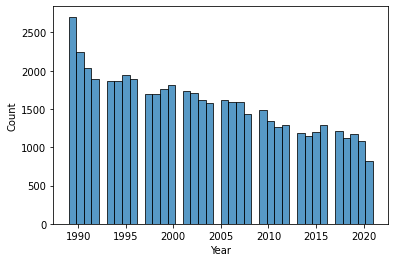

In [52]:
#Verificando quais faixas de horário mais ocorrem acidentes
sns.histplot(data=df_limpo, x=df_limpo['Year'])

In [67]:
df_limpo['Road User'].value_counts()

Driver                          23507
Passenger                       11937
Pedestrian                       8089
Motorcycle rider                 6561
Pedal cyclist                    1400
Motorcycle pillion passenger      355
Other                              84
Name: Road User, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='Count'>

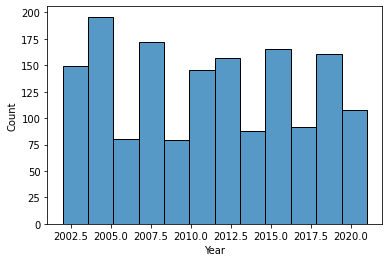

In [54]:
#Acidentes envolvendo caminhões
sns.histplot(data=Crash_truck, x=Crash_truck['Year'])

<AxesSubplot:xlabel='Road User', ylabel='count'>

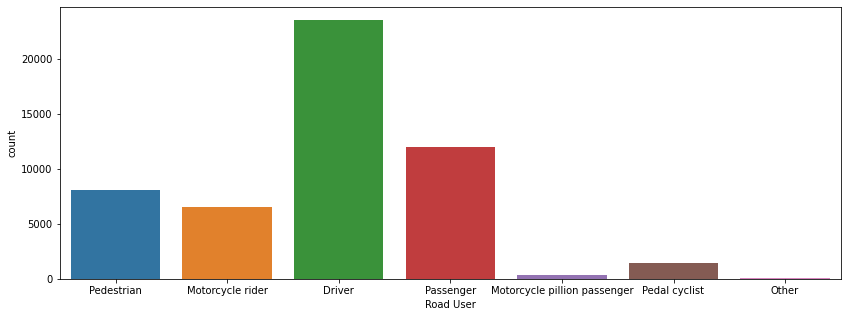

In [74]:
#Usuários mais afetados
plt.figure(figsize = (14,5))
sns.countplot(x=df_limpo['Road User'], data=df_limpo)

<AxesSubplot:xlabel='Gender', ylabel='count'>

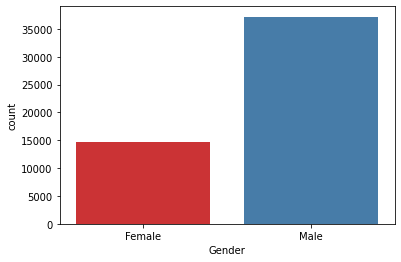

In [80]:
#Comparação de gêneros
sns.countplot(x=df_limpo['Gender'], data=df_limpo, palette="Set1")

<AxesSubplot:xlabel='Dayweek', ylabel='count'>

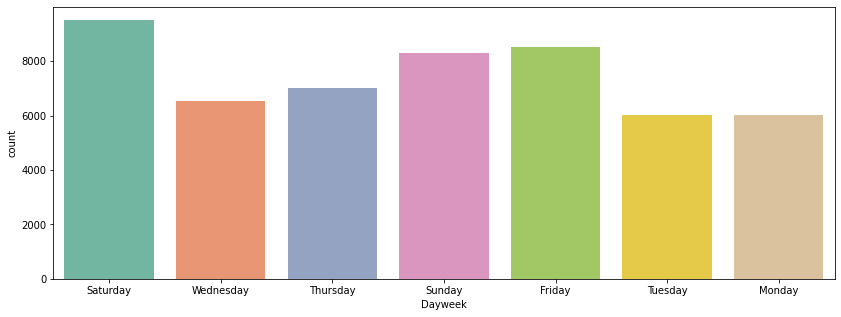

In [82]:
#Dias da semana que mais ocorrem acidentes. Fim de semana um pouco mais acima do que dias úteis
plt.figure(figsize = (14,5))
sns.countplot(x=df_limpo['Dayweek'], data=df_limpo, palette="Set2")

<AxesSubplot:xlabel='Day of week', ylabel='count'>

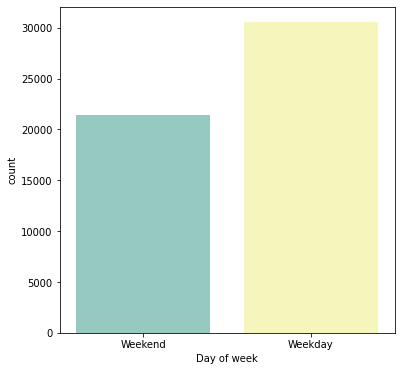

In [83]:
#Comparando fim de semana com dias úteis. Fim de semana ultrapassa os 20 mil acidentes, enquanto dias úteis ultrapassa 30 mil.
plt.figure(figsize = (6,6))
sns.countplot(x=df_limpo['Day of week'], data=df_limpo, palette="Set3")

<AxesSubplot:xlabel='Time of day', ylabel='count'>

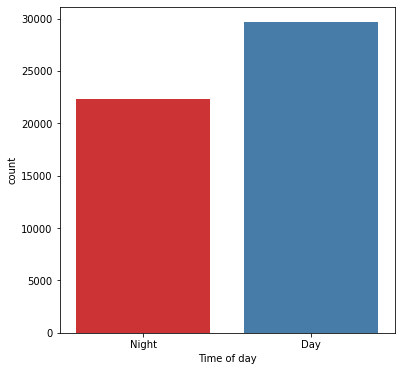

In [84]:
#Comparando dia e noite
plt.figure(figsize = (6,6))
sns.countplot(x=df_limpo['Time of day'], data=df_limpo, palette="Set1")

In [94]:
#Comparando dias úteis com fins de semana e separando por dia e noite. Separando acidentes noturnos para verificar dias da semana em que mais ocorrem
Night = df_limpo.loc[df_limpo['Time of day'] == 'Night'] 
Night


,State,Month,Year,Dayweek,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day,Hour,Minute
1,SA,9,2021,Saturday,Multiple,No,No,No,110.0,Pedestrian,Female,28,No,No,26_to_39,Weekend,Night,23,31
5,Qld,9,2021,Saturday,Multiple,No,No,No,100.0,Motorcycle rider,Male,19,No,No,17_to_25,Weekend,Night,4,00
6,WA,9,2021,Saturday,Single,No,No,No,100.0,Driver,Female,20,No,No,17_to_25,Weekend,Night,19,10
8,Qld,9,2021,Wednesday,Multiple,No,No,No,100.0,Passenger,Female,2,No,No,0_to_16,Weekday,Night,23,00
9,Qld,9,2021,Saturday,Single,No,No,No,60.0,Driver,Male,47,No,No,40_to_64,Weekend,Night,2,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52829,Tas,1,1989,Wednesday,Multiple,No,Unknown,Yes,100.0,Driver,Male,18,No,No,17_to_25,Weekday,Night,20,20
52830,WA,1,1989,Saturday,Multiple,No,Unknown,No,70.0,Driver,Female,24,No,No,17_to_25,Weekend,Night,5,05
52831,SA,1,1989,Saturday,Single,No,Unknown,No,60.0,Driver,Male,29,No,No,26_to_39,Weekend,Night,19,20
52832,Vic,1,1989,Saturday,Multiple,No,No,No,100.0,Driver,Male,29,No,No,26_to_39,Weekend,Night,22,54


<AxesSubplot:xlabel='Dayweek', ylabel='count'>

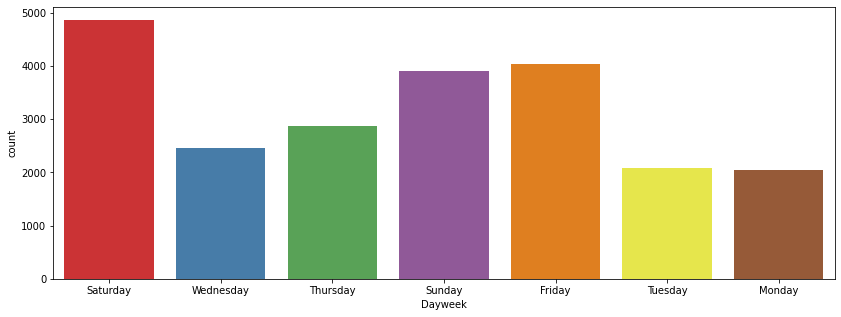

In [95]:
#Quantidade de acidentes noturnos por dia
plt.figure(figsize = (14,5))
sns.countplot(x=Night['Dayweek'], data=Night, palette="Set1")